In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow
from glob import glob
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

First we will use ImageDataGenerator a class in the Keras library for deep learning, which is used to preprocess image data. The flow_from_directory method is used to generate batches of image data from a directory containing subdirectories of images, with each subdirectory representing a class label. The method takes the path to the directory containing the images as an argument.

In [102]:
#Scale the pixel values of the images from a range of [0, 255] to [0, 1].
#Use 80% of the images for training and 20% for validation
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.8)
data    = datagen.flow_from_directory("FMD_DATASET", subset='validation',batch_size=64)

Found 11628 images belonging to 3 classes.


Data Information

In [103]:
counts = np.bincount(data.labels)
print("classes: ",data.class_indices,
      "\nimage shape: ", data.image_shape,
      "\n  * class 'incorrect_mask' (0): ", counts[0],
      "\n  * class 'with_mask' (1): ", counts[1],
      "\n  * class 'without_mask' (2): ", counts[2],)

classes:  {'incorrect_mask': 0, 'with_mask': 1, 'without_mask': 2} 
image shape:  (256, 256, 3) 
  * class 'incorrect_mask' (0):  4000 
  * class 'with_mask' (1):  3831 
  * class 'without_mask' (2):  3797


In [55]:
data.image_shape

(256, 256, 3)

In [56]:
data.labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

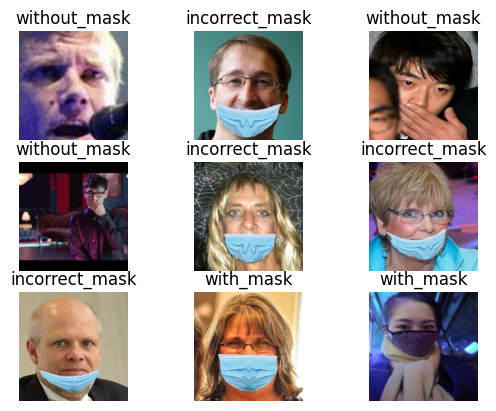

In [104]:
image_batch, labels_batch = data.next()

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i])
    label = labels_batch[i]
    if np.array_equal(label,np.array([1.,0.,0.])):
        plt.title('incorrect_mask')
    elif np.array_equal(label,np.array([0.,1.,0.])):
        plt.title('with_mask')
    else:
        plt.title('without_mask')
    plt.axis("off")


In [ ]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))

In [ ]:
# Initialize the PCA object with the number of components to keep
reduce_data = datagen.flow_from_directory("FMD_DATASET", target_size=(28,28),color_mode='grayscale') #resize images
pca = PCA()

# Fit the PCA object to your training data
pca.fit(reduce_data)

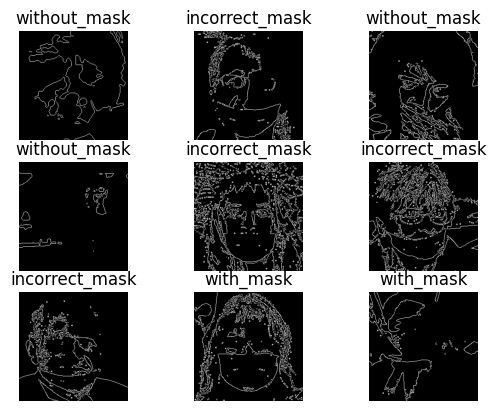

In [105]:
import cv2

# Edge detection
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img = image_batch[i]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.convertScaleAbs(gray)
    # Perform edge detection
    edges = cv2.Canny(gray, 0, 0.2)
    label = labels_batch[i]
    if np.array_equal(label,np.array([1.,0.,0.])):
        plt.imshow(edges, cmap='gray', vmin=0, vmax=255)
        plt.title('incorrect_mask')
    elif np.array_equal(label,np.array([0.,1.,0.])):
        plt.imshow(edges, cmap='gray', vmin=0, vmax=255)
        plt.title('with_mask')
    else:
        plt.imshow(edges, cmap='gray', vmin=0, vmax=255)
        plt.title('without_mask')
    plt.axis("off")
plt.show()


In [122]:

data_pca = datagen.flow_from_directory("FMD_DATASET",target_size=(28,28),
                                          subset='validation',batch_size=1000,color_mode='grayscale',shuffle='true')

x_batch, y_batch = next(data_pca)
reduce_data = x_batch
reduce_data = x_batch.reshape(x_batch.shape[0], -1)
# print(reduce_data.shape)
print(y_batch.shape)
print(reduce_data.shape)
pca = PCA()
# Fit the PCA object to your training data
pca.fit(reduce_data)

Found 11628 images belonging to 3 classes.
(1000, 3)
(1000, 784)


PCA()

In [123]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))

Number of components explaining 95% variance: 225


In [124]:
pca = PCA(n_components=k)
data_k_features = pca.fit_transform(reduce_data)
data_k_features.shape

(1000, 225)

Now we have 1000 vectors with 229 features. Each vector represent am image

In [125]:
from sklearn import svm
from sklearn.model_selection import train_test_split
y_batch = np.argmax(y_batch, axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_k_features, y_batch, test_size=0.2, random_state=42)
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: ", accuracy)


[0 2 0 1 2 1 1 2 2 2 1 0 0 1 1 0 0 1 1 0 0 0 2 2 0 2 0 2 0 2 1 0 1 0 2 2 1
 1 0 0 0 0 1 2 2 0 0 0 1 0 0 0 1 0 2 1 2 2 1 2 1 0 0 2 2 2 1 2 1 0 2 0 2 1
 2 2 1 2 2 1 2 1 2 2 1 1 0 2 0 1 1 2 1 0 2 1 0 2 0 1 0 0 1 0 0 0 1 2 2 0 1
 0 0 1 1 2 0 0 0 0 1 1 0 2 2 2 1 0 0 2 0 1 2 0 0 2 0 1 2 2 2 2 0 2 0 0 2 0
 0 1 2 2 2 2 1 1 0 1 2 1 2 2 0 1 0 2 1 1 1 0 0 0 1 0 2 0 0 2 1 2 0 0 1 1 1
 2 1 2 1 2 2 1 2 0 2 2 1 1 2 1]
Accuracy:  0.735
